<a href="https://colab.research.google.com/github/bathicodes/EXPERIMENTS/blob/main/Dogs_vs_Cats_tiny_VGG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Check GPU Status

In [1]:
!nvidia-smi

Thu Sep  8 15:01:34 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Import dataset from Google drive

In [2]:
from google.colab import drive
drive.mount('/content/drive')

train_path = '/content/drive/MyDrive/Machine Learning/ML Reboot/CNN with dataset/dataset/training_set'
test_path = '/content/drive/MyDrive/Machine Learning/ML Reboot/CNN with dataset/dataset/test_set'

Mounted at /content/drive


# Import libraries

In [3]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

# Creating augmented data generators

In [4]:
train_datagen = ImageDataGenerator(
    rescale=1/255.,
    shear_range=0.2,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(
    rescale=1/255
)

# Pre-processing data

In [5]:
training_data = train_datagen.flow_from_directory(
    train_path,
    target_size=(64,64),
    class_mode='binary',
    batch_size=32
)

test_data = test_datagen.flow_from_directory(
    test_path,
    target_size=(64,64),
    class_mode='binary',
    batch_size=32
)

Found 8001 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


# Model 1 (baseline model)

## Creating baseline model

In [6]:
# create the model 
model_1 = tf.keras.models.Sequential()

model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_1.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"))
model_1.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_1.add(tf.keras.layers.Flatten())

model_1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [7]:
# compile the model
model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [8]:
# fit the model
history_1 = model_1.fit(training_data,
            epochs=5,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 2194s 9s/step - loss: 0.6867 - accuracy: 0.5424 - val_loss: 0.6734 - val_accuracy: 0.5860
Epoch 2/5
251/251 [==============================] - 45s 179ms/step - loss: 0.6562 - accuracy: 0.6120 - val_loss: 0.6368 - val_accuracy: 0.6395
Epoch 3/5
251/251 [==============================] - 44s 174ms/step - loss: 0.6432 - accuracy: 0.6369 - val_loss: 0.6176 - val_accuracy: 0.6815
Epoch 4/5
251/251 [==============================] - 44s 174ms/step - loss: 0.6378 - accuracy: 0.6444 - val_loss: 0.6089 - val_accuracy: 0.6800
Epoch 5/5
251/251 [==============================] - 44s 174ms/step - loss: 0.6316 - accuracy: 0.6483 - val_loss: 0.6504 - val_accuracy: 0.6320


## Plot loss curves

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# plot the validation and training curves seperately

def plot_loss_curves(history):
  """
  Returns seperate loss curves for training and validation metrics
  """

  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # plot loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

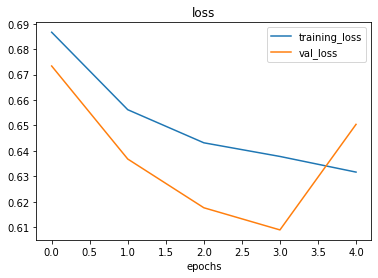

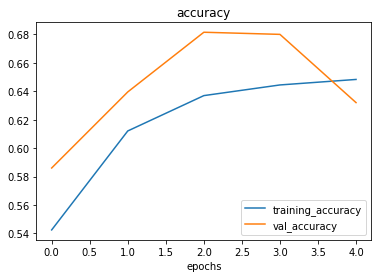

In [10]:
plot_loss_curves(history_1)

## Evaluate baseline model

In [11]:
model_1.evaluate(test_data)

63/63 [==============================] - 8s 127ms/step - loss: 0.6504 - accuracy: 0.6320


[0.6504184007644653, 0.6320000290870667]

# Model 2 - improving the baseline model

Adding more layers (Dense layer with 128 neurons)

## Creating the model 2

In [12]:
# create the model 2
model_2 = tf.keras.models.Sequential()

model_2.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_2.add(tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation="relu"))
model_2.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_2.add(tf.keras.layers.Flatten())

model_2.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_2.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [13]:
# compile the model 2
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [14]:
# fit the model 2
history_2 = model_2.fit(training_data,
            epochs=5,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 45s 177ms/step - loss: 0.6750 - accuracy: 0.5774 - val_loss: 0.6136 - val_accuracy: 0.6665
Epoch 2/5
251/251 [==============================] - 45s 180ms/step - loss: 0.6409 - accuracy: 0.6389 - val_loss: 0.6040 - val_accuracy: 0.6710
Epoch 3/5
251/251 [==============================] - 46s 184ms/step - loss: 0.6202 - accuracy: 0.6548 - val_loss: 0.6005 - val_accuracy: 0.6690
Epoch 4/5
251/251 [==============================] - 46s 184ms/step - loss: 0.6081 - accuracy: 0.6663 - val_loss: 0.6432 - val_accuracy: 0.6325
Epoch 5/5
251/251 [==============================] - 46s 184ms/step - loss: 0.5987 - accuracy: 0.6777 - val_loss: 0.6680 - val_accuracy: 0.6175


## Plot loss curves

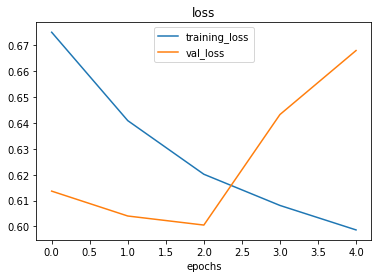

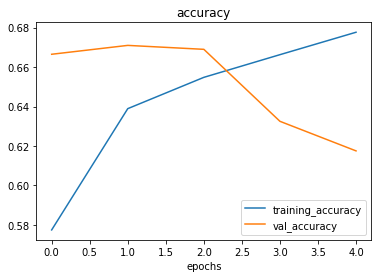

In [15]:
plot_loss_curves(history_2)

## Evaluate the model 2

In [16]:
model_2.evaluate(test_data)

63/63 [==============================] - 7s 115ms/step - loss: 0.6680 - accuracy: 0.6175


[0.6679562330245972, 0.6175000071525574]

# Model 3 - Improvement for the model 2
Adding more filters to the Conv2D layers

## Creating model 3

In [17]:
# create the model 3
model_3 = tf.keras.models.Sequential()

model_3.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_3.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu"))
model_3.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_3.add(tf.keras.layers.Flatten())

model_3.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_3.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [18]:
# compile model 3
model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [19]:
# fit the model 3
history_3 = model_3.fit(training_data,
            epochs=5,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/5
251/251 [==============================] - 45s 179ms/step - loss: 0.6926 - accuracy: 0.5241 - val_loss: 0.6799 - val_accuracy: 0.5220
Epoch 2/5
251/251 [==============================] - 45s 180ms/step - loss: 0.6540 - accuracy: 0.6124 - val_loss: 0.6593 - val_accuracy: 0.6020
Epoch 3/5
251/251 [==============================] - 44s 174ms/step - loss: 0.6395 - accuracy: 0.6410 - val_loss: 0.5904 - val_accuracy: 0.6865
Epoch 4/5
251/251 [==============================] - 43s 172ms/step - loss: 0.6086 - accuracy: 0.6645 - val_loss: 0.5757 - val_accuracy: 0.7095
Epoch 5/5
251/251 [==============================] - 43s 173ms/step - loss: 0.5873 - accuracy: 0.6857 - val_loss: 0.5400 - val_accuracy: 0.7275


## Plot loss curves

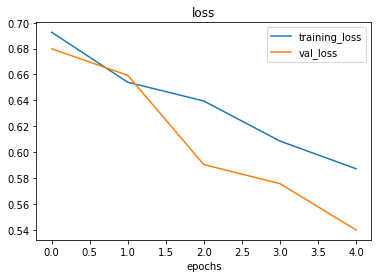

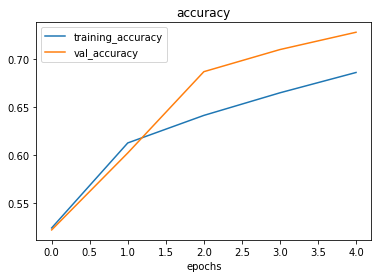

In [20]:
plot_loss_curves(history_3)

## Evaluate the model 3

In [21]:
model_3.evaluate(test_data)

63/63 [==============================] - 7s 112ms/step - loss: 0.5400 - accuracy: 0.7275


[0.5400071144104004, 0.7275000214576721]

# Model 4 - adding more epochs
model 3 seems overfitting therefore adding more epochs to the model.

## creating model 4

In [22]:
# create the model 4
model_4 = tf.keras.models.Sequential()

model_4.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_4.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu"))
model_4.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_4.add(tf.keras.layers.Flatten())

model_4.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_4.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [23]:
# compile model 4
model_4.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [24]:
# fit the model 4
history_4 = model_4.fit(training_data,
            epochs=25,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/25
251/251 [==============================] - 44s 174ms/step - loss: 0.6885 - accuracy: 0.5389 - val_loss: 0.6669 - val_accuracy: 0.6160
Epoch 2/25
251/251 [==============================] - 43s 173ms/step - loss: 0.6566 - accuracy: 0.6084 - val_loss: 0.6159 - val_accuracy: 0.6525
Epoch 3/25
251/251 [==============================] - 43s 173ms/step - loss: 0.6274 - accuracy: 0.6475 - val_loss: 0.6376 - val_accuracy: 0.6565
Epoch 4/25
251/251 [==============================] - 44s 176ms/step - loss: 0.6130 - accuracy: 0.6589 - val_loss: 0.5866 - val_accuracy: 0.6885
Epoch 5/25
251/251 [==============================] - 43s 172ms/step - loss: 0.6043 - accuracy: 0.6692 - val_loss: 0.6765 - val_accuracy: 0.6335
Epoch 6/25
251/251 [==============================] - 43s 172ms/step - loss: 0.5833 - accuracy: 0.6907 - val_loss: 0.5870 - val_accuracy: 0.6935
Epoch 7/25
251/251 [==============================] - 44s 176ms/step - loss: 0.5843 - accuracy: 0.6837 - val_loss: 0.5931 - val_ac

## Plot loss curves

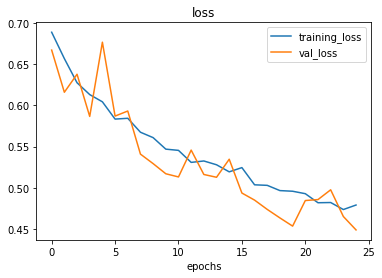

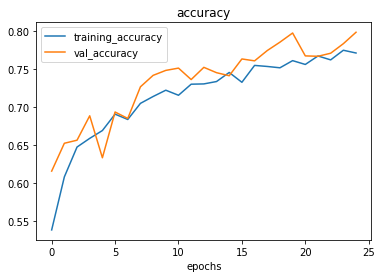

In [25]:
plot_loss_curves(history_4)

##Evaluate model 4

In [26]:
model_4.evaluate(test_data)

63/63 [==============================] - 8s 125ms/step - loss: 0.4491 - accuracy: 0.7980


[0.449069082736969, 0.7979999780654907]

# Model 5 - Improvment for the model 4
adding more filters to the second Conv2D layer.

## creating model 5

In [27]:
# create the model 5
model_5 = tf.keras.models.Sequential()

model_5.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_5.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_5.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_5.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_5.add(tf.keras.layers.Flatten())

model_5.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_5.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [28]:
# compile model 5
model_5.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [29]:
# fit the model 5
history_5 = model_5.fit(training_data,
            epochs=25,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/25
251/251 [==============================] - 44s 172ms/step - loss: 0.6874 - accuracy: 0.5356 - val_loss: 0.6500 - val_accuracy: 0.5920
Epoch 2/25
251/251 [==============================] - 43s 171ms/step - loss: 0.6367 - accuracy: 0.6385 - val_loss: 0.6774 - val_accuracy: 0.6315
Epoch 3/25
251/251 [==============================] - 43s 171ms/step - loss: 0.6168 - accuracy: 0.6558 - val_loss: 0.5725 - val_accuracy: 0.7055
Epoch 4/25
251/251 [==============================] - 44s 175ms/step - loss: 0.6041 - accuracy: 0.6670 - val_loss: 0.5851 - val_accuracy: 0.6905
Epoch 5/25
251/251 [==============================] - 43s 171ms/step - loss: 0.5838 - accuracy: 0.6819 - val_loss: 0.5514 - val_accuracy: 0.7185
Epoch 6/25
251/251 [==============================] - 43s 171ms/step - loss: 0.5754 - accuracy: 0.6942 - val_loss: 0.5285 - val_accuracy: 0.7375
Epoch 7/25
251/251 [==============================] - 43s 173ms/step - loss: 0.5617 - accuracy: 0.7064 - val_loss: 0.5204 - val_ac

## Plot loss curves

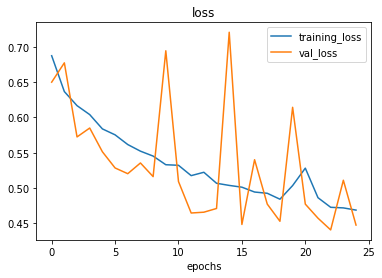

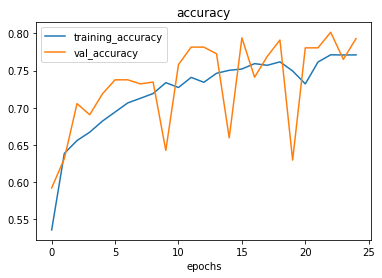

In [30]:
plot_loss_curves(history_5)

## Evaluate model 5

In [31]:
model_5.evaluate(test_data)

63/63 [==============================] - 8s 122ms/step - loss: 0.4477 - accuracy: 0.7930


[0.4476536810398102, 0.7929999828338623]

# Model 6 - Imporvment for model 5
Adding more convolutional and maxpool layer

## Creating the model

In [32]:
# create the model 6
model_6 = tf.keras.models.Sequential()

model_6.add(tf.keras.layers.Conv2D(filters=16, kernel_size=3, activation="relu", input_shape=(64,64,3)))
model_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_6.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_6.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu"))
model_6.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

model_6.add(tf.keras.layers.Flatten())

model_6.add(tf.keras.layers.Dense(units=128, activation="relu"))
model_6.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

In [33]:
# compile model 6
model_6.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [34]:
# fit the model 6
history_6 = model_6.fit(training_data,
            epochs=25,
            steps_per_epoch=len(training_data),
            validation_data=test_data,
            validation_steps=len(test_data))

Epoch 1/25
251/251 [==============================] - 44s 171ms/step - loss: 0.6873 - accuracy: 0.5459 - val_loss: 0.6643 - val_accuracy: 0.6045
Epoch 2/25
251/251 [==============================] - 43s 171ms/step - loss: 0.6528 - accuracy: 0.6154 - val_loss: 0.6208 - val_accuracy: 0.6515
Epoch 3/25
251/251 [==============================] - 43s 172ms/step - loss: 0.6241 - accuracy: 0.6559 - val_loss: 0.6314 - val_accuracy: 0.6640
Epoch 4/25
251/251 [==============================] - 44s 176ms/step - loss: 0.6079 - accuracy: 0.6678 - val_loss: 0.6305 - val_accuracy: 0.6255
Epoch 5/25
251/251 [==============================] - 43s 171ms/step - loss: 0.5840 - accuracy: 0.6918 - val_loss: 0.5590 - val_accuracy: 0.7160
Epoch 6/25
251/251 [==============================] - 43s 171ms/step - loss: 0.5751 - accuracy: 0.6955 - val_loss: 0.5221 - val_accuracy: 0.7570
Epoch 7/25
251/251 [==============================] - 44s 175ms/step - loss: 0.5657 - accuracy: 0.7059 - val_loss: 0.5248 - val_ac

## Plot loss curves

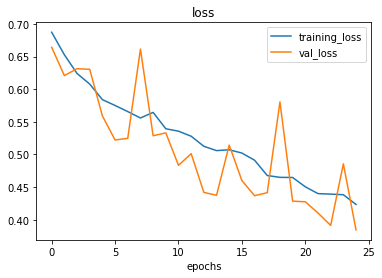

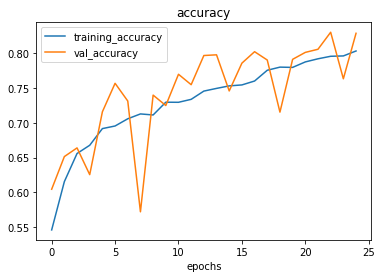

In [35]:
plot_loss_curves(history_6)

## Evaluate the model 6

In [36]:
model_6.evaluate(test_data)

63/63 [==============================] - 7s 109ms/step - loss: 0.3843 - accuracy: 0.8290


[0.38432541489601135, 0.8289999961853027]